<a href="https://colab.research.google.com/github/yousraMel/neural-networks/blob/master/SinNoise_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)

In [ ]:
t = np.arange(0,1500)
x = np.sin(0.015*t) + np.random.uniform(low=-1, high=1, size=(1500,))
x_without_noise = np.sin(0.015*t)
plt.plot(x)
plt.plot(x_without_noise) 

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
normalizer  = MinMaxScaler(feature_range=(0,1))
x = (np.reshape(x,(-1,1)))
x = normalizer.fit_transform(x)
print(x)

[[0.47275463]
 [0.67363402]
 [0.36669655]
 ...
 [0.29754438]
 [0.5416369 ]
 [0.47962244]]


In [9]:
train = x[0:1000]
test = x[1000:]

print(test.shape)

(500, 1)


In [11]:
def createDataset(data, step):
  X, Y = [], []
  for i in range(len(data)-step):
    X.append(data[i:i+step])
    Y.append(data[i+step])
  return np.array(X), np.array(Y)

step = 10
trainX, trainY = createDataset(train, step)
testX, testY = createDataset(test, step)

In [12]:
print(trainX[0])

[[0.47275463]
 [0.67363402]
 [0.36669655]
 [0.50793247]
 [0.73177721]
 [0.60301476]
 [0.67289061]
 [0.55185651]
 [0.77255036]
 [0.57840481]]


In [13]:
print(trainY[0])

[0.30780513]


In [14]:
print(trainX.shape)

(990, 10, 1)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [18]:
model = Sequential()
model.add(SimpleRNN(units=1, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

history = model.fit(trainX, trainY, epochs=500, batch_size=16, verbose=2 )

Epoch 1/500
62/62 - 1s - loss: 0.2289
Epoch 2/500
62/62 - 0s - loss: 0.1262
Epoch 3/500
62/62 - 0s - loss: 0.0739
Epoch 4/500
62/62 - 0s - loss: 0.0573
Epoch 5/500
62/62 - 0s - loss: 0.0517
Epoch 6/500
62/62 - 0s - loss: 0.0485
Epoch 7/500
62/62 - 0s - loss: 0.0463
Epoch 8/500
62/62 - 0s - loss: 0.0450
Epoch 9/500
62/62 - 0s - loss: 0.0438
Epoch 10/500
62/62 - 0s - loss: 0.0429
Epoch 11/500
62/62 - 0s - loss: 0.0421
Epoch 12/500
62/62 - 0s - loss: 0.0415
Epoch 13/500
62/62 - 0s - loss: 0.0411
Epoch 14/500
62/62 - 0s - loss: 0.0406
Epoch 15/500
62/62 - 0s - loss: 0.0402
Epoch 16/500
62/62 - 0s - loss: 0.0398
Epoch 17/500
62/62 - 0s - loss: 0.0394
Epoch 18/500
62/62 - 0s - loss: 0.0391
Epoch 19/500
62/62 - 0s - loss: 0.0388
Epoch 20/500
62/62 - 0s - loss: 0.0385
Epoch 21/500
62/62 - 0s - loss: 0.0382
Epoch 22/500
62/62 - 0s - loss: 0.0379
Epoch 23/500
62/62 - 0s - loss: 0.0375
Epoch 24/500
62/62 - 0s - loss: 0.0373
Epoch 25/500
62/62 - 0s - loss: 0.0370
Epoch 26/500
62/62 - 0s - loss: 0.

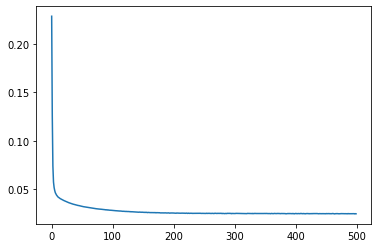

In [19]:
loss = history.history['loss']

plt.plot(loss)

In [20]:
trainPredict = normalizer.inverse_transform(model.predict(trainX))
testPredict = normalizer.inverse_transform(model.predict(testX))
predicted = np.concatenate((trainPredict,testPredict))
x = normalizer.inverse_transform(x)

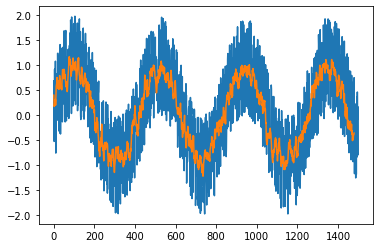

In [21]:
plt.plot(x)
plt.plot(predicted)